In [1]:
import h5py
import numpy as np

# --- Parameters ---
dat_path = '/Volumes/Lab/Users/alexth/axolotl/201703151_data001.dat'  # Update this
h5_in_path = '/Volumes/Lab/Users/alexth/axolotl/201703151_kilosort_data001_spike_times.h5'  # from MATLAB export

sampling_rate = 20000  # Hz

# --- Load spike times from HDF5 ---
all_spikes = {}
with h5py.File(h5_in_path, 'r') as f:
    unit_ids = sorted(f['/spikes'].keys(), key=lambda x: int(x.split('_')[1]))
    for uid in unit_ids:
        unit_index = int(uid.split('_')[1])
        raw = f[f'/spikes/{uid}'][:]
        if raw.ndim == 1 and raw.shape[0] == 1:
            spikes_sec = np.array(raw[0]).flatten()
        else:
            spikes_sec = np.array(raw).flatten()
        spikes_samples = np.round(spikes_sec * sampling_rate).astype(np.int32)
        all_spikes[unit_index] = spikes_samples

    # Load electrode positions
    ei_positions = f['/ei_positions'][:].T  # shape becomes [512 x 2]



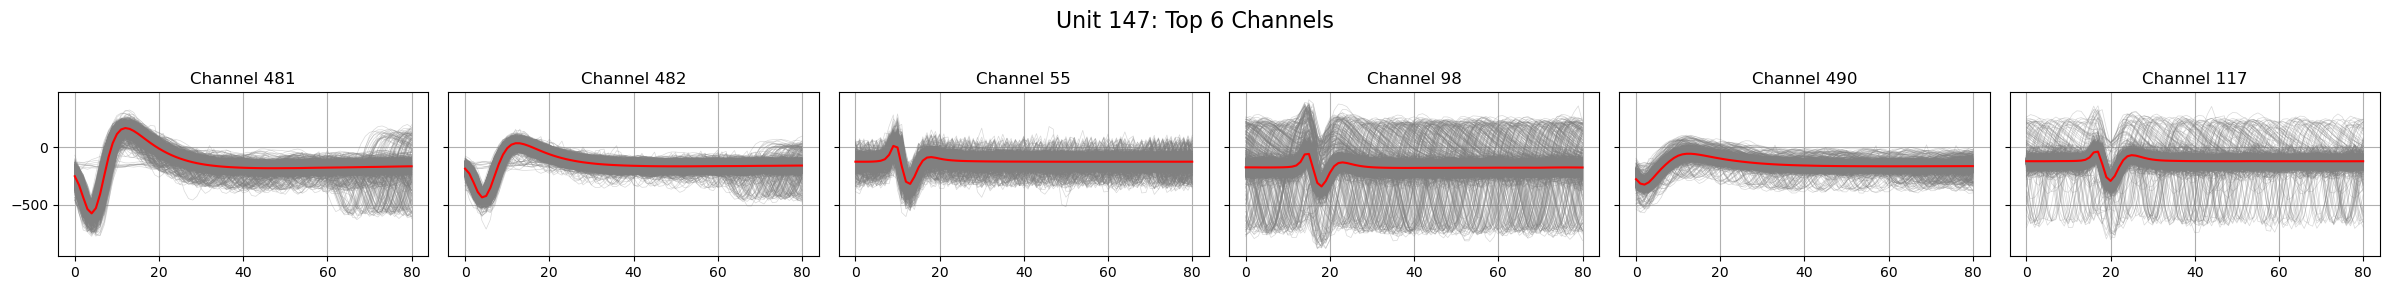

In [3]:
# EI_inspection.ipynb

import numpy as np
import h5py
import matplotlib.pyplot as plt

from extract_data_snippets import extract_snippets  # must be in your path

# --- Parameters ---
dat_path = '/Volumes/Lab/Users/alexth/axolotl/201703151_data001.dat'
ei_path = '/Volumes/Lab/Users/alexth/axolotl/201703151_data001_parasol_eis.h5'
ks_id = 147  # change this as needed

window = (-20, 60)  # window around spike in samples
n_channels = 512
dtype = 'int16'
n_to_plot = 6

# --- Load EI ---
with h5py.File(ei_path, 'r') as f:
    ei = f[f'unit_{ks_id}'][:]  # shape: [512 x T]

# --- Load spike times ---
spike_times = all_spikes[ks_id]

# --- Compute peak-to-peak per channel ---
ei_ptp = ei.max(axis=1) - ei.min(axis=1)
top_channels = np.argsort(ei_ptp)[-n_to_plot:][::-1]

# --- Extract snippets ---
snips = extract_snippets(dat_path, spike_times, window=window, n_channels=n_channels, dtype=dtype)
T = snips.shape[1]

# --- Plot ---
fig, axs = plt.subplots(1, n_to_plot, figsize=(4 * n_to_plot, 3), sharey=True)

for i, chan in enumerate(top_channels):
    ax = axs[i]
    waveforms = snips[chan, :, :]  # shape: [T x N]
    for k in range(waveforms.shape[1]):
        ax.plot(waveforms[:, k], color='gray', alpha=0.3, linewidth=0.5)
    mean_trace = np.mean(waveforms, axis=1)
    ax.plot(mean_trace, color='red', linewidth=1.5)
    ax.set_title(f'Channel {chan}')
    ax.grid(True)

fig.suptitle(f'Unit {ks_id}: Top {n_to_plot} Channels', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [2]:
# EI_inspection.ipynb

import numpy as np
import h5py
import matplotlib.pyplot as plt

from extract_data_snippets import extract_snippets_blockwise  # must be in your path

# --- Parameters ---
dat_path = '/Volumes/Lab/Users/alexth/axolotl/201703151_data001.dat'
ei_path = '/Volumes/Lab/Users/alexth/axolotl/201703151_data001_parasol_eis.h5'
ks_id = 65  # change this as needed

window = (-20, 60)  # window around spike in samples
n_channels = 512
dtype = 'int16'
n_to_plot = 6

# --- Load EI ---
with h5py.File(ei_path, 'r') as f:
    ei = f[f'unit_{ks_id}'][:]  # shape: [512 x T]

# --- Load spike times ---
spike_times = all_spikes[ks_id]

# --- Compute peak-to-peak per channel ---
ei_ptp = ei.max(axis=1) - ei.min(axis=1)
top_channels = np.argsort(ei_ptp)[-n_to_plot:][::-1]

# --- Extract snippets ---
snips = extract_snippets_blockwise(dat_path, spike_times, window=window, n_channels=n_channels, dtype=dtype)
T = snips.shape[1]

# --- Plot ---
fig, axs = plt.subplots(1, n_to_plot, figsize=(4 * n_to_plot, 3), sharey=True)

for i, chan in enumerate(top_channels):
    ax = axs[i]
    waveforms = snips[chan, :, :]  # shape: [T x N]
    for k in range(waveforms.shape[1]):
        ax.plot(waveforms[:, k], color='gray', alpha=0.3, linewidth=0.5)
    mean_trace = np.mean(waveforms, axis=1)
    ax.plot(mean_trace, color='red', linewidth=1.5)
    ax.set_title(f'Channel {chan}')
    ax.grid(True)

fig.suptitle(f'Unit {ks_id}: Top {n_to_plot} Channels', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


KeyboardInterrupt: 

In [10]:
import time
import numpy as np

start = time.time()
data = np.fromfile('/Volumes/Lab/Users/alexth/axolotl/201703151_data001.dat', dtype='int16', count=512*100000)  # ~1 sec of data
elapsed = time.time() - start
print(f"Read time: {elapsed:.3f} s")


Read time: 0.848 s
